In [ ]:
import pandas as pd
import numpy as np
#se puede acceder al archivo en el siguiente enlace: https://drive.google.com/drive/folders/155axDNF8oWJAo0rWz3ZzXWz34LD4XhrH?usp=sharing

#leer el data
msrp_df=pd.read_csv('/content/data.csv')


In [ ]:
msrp_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
msrp_df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
msrp_df.info()
print('='*30)
msrp_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
#Obtener el numero de puntos de datos faltantes por columna
missing_values_count = msrp_df.isnull().sum()
#imprimir
print(missing_values_count)

total_cells = np.prod(msrp_df.shape)
total_missing = missing_values_count.sum()
print('#'*30)
print("\n Porcentaje de valores faltantes:")
print((total_missing/total_cells) * 100)

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64
##############################

 Porcentaje de valores faltantes:
2.0196827262044654


In [ ]:
#modificaciones a valores nulos
# Imputación personalizada de valores nulos

# Engine HP - usar mediana
msrp_df['Engine HP'].fillna(msrp_df['Engine HP'].median(), inplace=True)

# Engine Cylinders - usar moda
msrp_df['Engine Cylinders'].fillna(msrp_df['Engine Cylinders'].mode()[0], inplace=True)

# Number of Doors - usar moda
msrp_df['Number of Doors'].fillna(msrp_df['Number of Doors'].mode()[0], inplace=True)
#Para las columnas object :

# Market Category - rellenar con 'Unknown'
msrp_df['Market Category'].fillna('Unknown', inplace=True)

# Rellenar en función del 'Make' (fabricante), si el patrón es claro
msrp_df['Engine Fuel Type'] = msrp_df.groupby('Make')['Engine Fuel Type'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)

msrp_df.head()

<ipython-input-22-943621a1c44a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  msrp_df['Engine HP'].fillna(msrp_df['Engine HP'].median(), inplace=True)
<ipython-input-22-943621a1c44a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
#Guardar un nuevo dataset
import os
folder= "new_dataset"
os.makedirs(folder, exist_ok=True)
ruta_nuevo_data=os.path.join(folder, 'msrp_new.csv')
msrp_df.to_csv(ruta_nuevo_data, index=False)
print(f"\n ¡¡¡ Dataset limpio guardado en: {ruta_nuevo_data}!!!")


 ¡¡¡ Dataset limpio guardado en: new_dataset/msrp_new.csv!!!


In [ ]:
#hay que imprimir los valores unicos de las columnas tipo object:
msrp_new=pd.read_csv('/content/new_dataset/msrp_new.csv')
object_columns = msrp_new.select_dtypes(include=['object']).columns
for col in object_columns:
    print('Columna:', {col})
    unique_values= msrp_new[col].unique()
    #organizar alfabeticamente
    unique_values.sort()
    print(unique_values)
    print("-" * 30)

Columna: {'Make'}
['Acura' 'Alfa Romeo' 'Aston Martin' 'Audi' 'BMW' 'Bentley' 'Bugatti'
 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge' 'FIAT' 'Ferrari' 'Ford'
 'GMC' 'Genesis' 'HUMMER' 'Honda' 'Hyundai' 'Infiniti' 'Kia' 'Lamborghini'
 'Land Rover' 'Lexus' 'Lincoln' 'Lotus' 'Maserati' 'Maybach' 'Mazda'
 'McLaren' 'Mercedes-Benz' 'Mitsubishi' 'Nissan' 'Oldsmobile' 'Plymouth'
 'Pontiac' 'Porsche' 'Rolls-Royce' 'Saab' 'Scion' 'Spyker' 'Subaru'
 'Suzuki' 'Tesla' 'Toyota' 'Volkswagen' 'Volvo']
------------------------------
Columna: {'Model'}
['1 Series' '1 Series M' '100' '124 Spider' '190-Class' '2' '2 Series'
 '200' '200SX' '240' '240SX' '3' '3 Series' '3 Series Gran Turismo' '300'
 '300-Class' '3000GT' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z'
 '4 Series' '4 Series Gran Coupe' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5' '5 Series' '5 Series Gran Turismo' '500'
 '500-Class' '500L' '500X' '500e' '550' '560-Class' '57' '570S' '575M'
 '599' '6' '6 Series' '

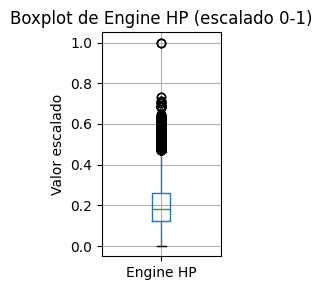

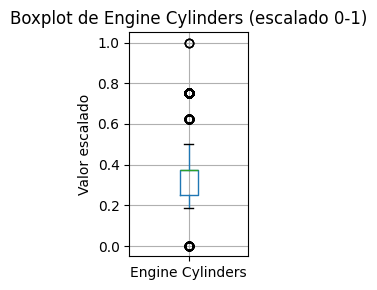

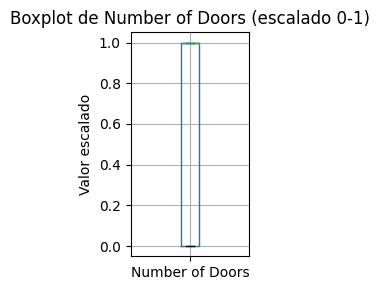

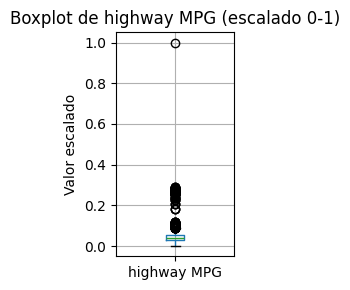

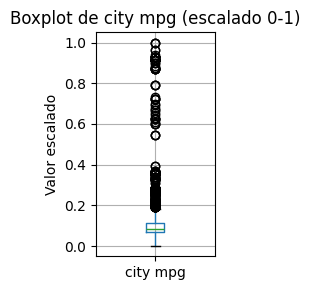

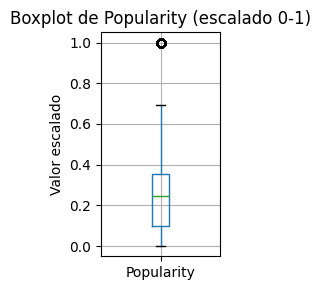

In [31]:
#boxplot para columnas numéricas escaladas
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Eliminar el target y el año

df = msrp_new.drop(columns=['MSRP','Year'], errors='ignore')
# Seleccionar columnas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Filtrar columnas con valores máximos mayores a 1
filtered_cols = [col for col in num_cols if df[col].max() > 1]

# Escalar datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[filtered_cols])
scaled_df = pd.DataFrame(scaled_data, columns=filtered_cols)

# Crear un boxplot por columna
for col in filtered_cols:
    plt.figure(figsize=(2, 3))
    scaled_df.boxplot(column=col)
    plt.title(f'Boxplot de {col} (escalado 0-1)')
    plt.ylabel('Valor escalado')
    plt.tight_layout()
    plt.show()